## Pymaceuticals Data Analysis

* Across the board we observe that Capomulin is the most successful drug at each visualized measurement. Capomulin reduced tumor size the most, it has the least amount of cancerous sites, and the mice administered this drug experienced better life expectancy against those adminstered any other drug.


* Ketapril underperforms the Placebo in every facet. It seems to encourage tumor growth while increasing the amount of metastatic sites more than the Placebo by the end of the study. However, the one measurement where Ketapril challenged the Placebo is life expectancy (or survival rate). The mice adminstered Ketapril survived at a higher rate for the first few days, and by the end accelerated downward to equal the Placebo groups surviving count. Thus, Kepapril is a more viable option early in the treatment cycle than nothing.


* Though not visualized, it would be interesting to compare our Capomulin to Ramicane. In the DataFrames snapshotted below, it seems that the latter holds up and even beats our visually-best medication. It's obvious that it reduces tumor size the most, and at a smaller error; and the data shows that Ramicane yields the same survival rate and even fewer metastatic sites. Ramicane may be the number one choice for treatment, leaving Capomulin at the number two spot. However, to conclude the preferable medication between the two when they're both so close would require more research.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_trial_df, mouse_drug_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.sort_values("Timepoint", ascending=True, inplace=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,i635,0,45.0,0,Propriva
2,g791,0,45.0,0,Ramicane
3,w746,0,45.0,0,Propriva
4,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_data = combined_df.groupby(['Drug','Timepoint'], as_index=False)['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume_data)

# Preview DataFrame
mean_tumor_volume_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume_data = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Convert to DataFrame
sem_tumor_volume_df = pd.DataFrame(sem_tumor_volume_data)

# Preview DataFrame
sem_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
munged_mean_df = mean_tumor_volume_df.pivot('Timepoint', 'Drug', 'Tumor Volume (mm3)')

# Preview that Reformatting worked
munged_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
munged_sem_df = sem_tumor_volume_df.pivot('Timepoint', 'Drug', 'Tumor Volume (mm3)')

# Preview that Reformatting worked
munged_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


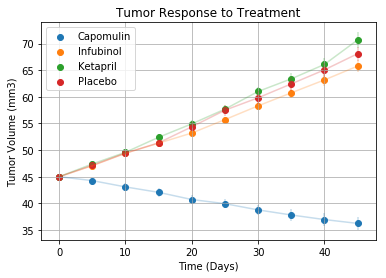

In [18]:
# Generate the Plot (with Error Bars)
drug_names = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig, ax = plt.subplots()

for drugs in drug_names:
    ax.scatter(munged_mean_df.index, y=munged_mean_df[drugs])

ax.legend()

for drugs in drug_names:
    ax.errorbar(munged_mean_df.index, y=munged_mean_df[drugs], yerr=munged_sem_df[drugs], alpha=.25)
    
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.grid()

# Save the Figure
fig.savefig('Tumor Response to Treatment.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_data = combined_df.groupby(['Drug','Timepoint'], as_index=False)['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site_data)

# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site_data = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index()

# Convert to DataFrame
sem_met_site_df = pd.DataFrame(sem_met_site_data)

# Preview DataFrame
sem_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
munged_met_mean_df = mean_met_site_df.pivot('Timepoint', 'Drug', 'Metastatic Sites')

# Preview that Reformatting worked
munged_met_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
munged_met_sem_df = sem_met_site_df.pivot('Timepoint', 'Drug', 'Metastatic Sites')

# Preview that Reformatting worked
munged_met_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


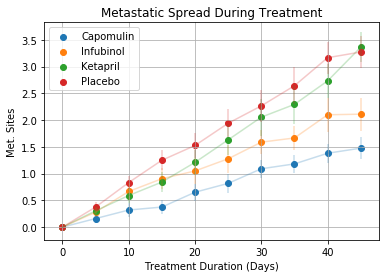

In [11]:
# Generate the Plot (with Error Bars)
drug_names = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig, ax = plt.subplots()

for drugs in drug_names:
    ax.scatter(munged_met_mean_df.index, y=munged_met_mean_df[drugs])

ax.legend()

for drugs in drug_names:
    ax.errorbar(munged_met_mean_df.index, y=munged_met_mean_df[drugs], yerr=munged_met_sem_df[drugs], alpha=.25)
    
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.grid()

# Save the Figure
fig.savefig('Metastatic Spread During Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_data = combined_df.groupby(['Drug','Timepoint'], as_index=False)['Mouse ID'].count()

# Convert to DataFrame
count_mice_df = pd.DataFrame(count_mice_data)

# Preview DataFrame
count_mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
munged_mice_count_df = count_mice_df.pivot('Timepoint', 'Drug', 'Mouse ID')

# Preview the Data Frame
munged_mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


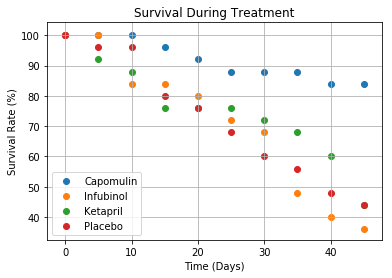

In [14]:
# Generate the Plot (Accounting for percentages)
drug_names = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig, ax = plt.subplots()

for drugs in drug_names:
    ax.scatter(munged_mice_count_df.index, y=munged_mice_count_df[drugs]/25*100)

ax.legend()
    
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
ax.grid()

# Save the Figure
fig.savefig('Survival During Treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
percent_change = (munged_mean_df.iloc[9] - munged_mean_df.iloc[0])/munged_mean_df.iloc[0]*100
    
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

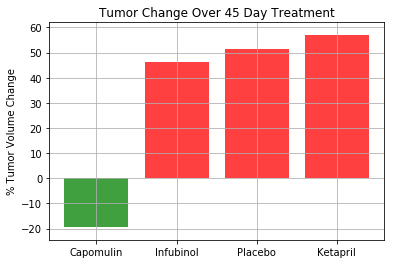

In [16]:
# Store all Relevant Percent Changes into a Tuple
percent_tup = sorted(tuple(percent_change[{"Capomulin", "Infubinol", "Ketapril", "Placebo"}]))

# Splice the data between passing and failing drugs
passing_drugs = percent_tup[0]
failing_drugs = percent_tup[1:]

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

x_axis = np.arange(0, len(percent_tup))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.ylim(min(percent_tup) - 5, max(percent_tup) + 5)
plt.grid()

# Use functions to label the percentages of changes
failing_names = ['Infubinol', 'Placebo', 'Ketapril']
passing_names = ['Capomulin']
plt.bar(passing_names, passing_drugs, facecolor='green', alpha=0.75, align='center')
plt.bar(failing_names, failing_drugs, facecolor="red", alpha=0.75, align="center")


# Call functions to implement the function calls

# Save the Figure
plt.savefig('Tumor Change Over 45 Day Treatment.png')

# Show the Figure
plt.show()